In [1]:
import tensorflow as tf 
import numpy as np

In [2]:
x_data = np.float32(np.random.rand(2, 100)) # 随机输入
y_data = np.dot([0.100, 0.200], x_data) + 0.300

In [3]:
# 构造一个线性模型
# 
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1, 2], -1.0, 1.0))
y = tf.matmul(W, x_data) + b

# 最小化方差
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# 初始化变量
init = tf.initialize_all_variables()

# 启动图 (graph)
sess = tf.Session()
sess.run(init)


Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [7]:
# 拟合平面
for step in range(0, 201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [[ 0.65815401  0.32266214]] [-0.07014604]
20 [[ 0.259004    0.25483221]] [ 0.19644268]
40 [[ 0.14497289  0.21912579]] [ 0.26875514]
60 [[ 0.11288873  0.20627004]] [ 0.29061931]
80 [[ 0.10373051  0.20198458]] [ 0.29719311]
100 [[ 0.10108766  0.20061478]] [ 0.29916209]
120 [[ 0.10031881  0.20018786]] [ 0.29975027]
140 [[ 0.1000938   0.20005688]] [ 0.29992566]
160 [[ 0.10002767  0.20001712]] [ 0.2999779]
180 [[ 0.10000819  0.20000513]] [ 0.29999343]
200 [[ 0.10000242  0.20000154]] [ 0.29999804]


### 下面讲一下tensorflow的基本使用

In [17]:
##构建图
import tensorflow as tf
matrix1 = tf.constant([[3.,3.]])
matrix2 = tf.constant([[2.],[2.]])
product = tf.matmul(matrix1, matrix2)

In [83]:
##在会话中启动图
with tf.Session() as sess:
    with tf.device("/cpu:0"):
        matrix1 = tf.constant([[3., 3.]])
        matrix2 = tf.constant([[2.],[2.]])
        product = tf.matmul(matrix1, matrix2)
        sess1 = tf.Session()
        result = sess1.run(product)
        print(result)
        sess1.close()

In [26]:
##交互式使用
# 进入一个交互式 TensorFlow 会话.
#sub函数被换成了subtract 
import tensorflow as tf
sess = tf.InteractiveSession()

x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])

# 使用初始化器 initializer op 的 run() 方法初始化 'x' 
x.initializer.run()

# 增加一个减法 sub op, 从 'x' 减去 'a'. 运行减法 op, 输出结果 
sub = tf.subtract(x, a)
print (sub.eval())

[-2. -1.]


In [62]:
###变量
# 创建一个变量, 初始化为标量 0.
state = tf.Variable(0, name="counter")

# 创建一个 op, 其作用是使 state 增加 1
one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state,new_value)
init_op = tf.initialize_all_variables()
sess = tf.InteractiveSession()
sess.run(init_op)
print(sess.run(state))
sess.close()

0


In [60]:
# Fetch的使用

input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)
intermed = tf.add(input2, input3)
mul = tf.multiply(input1, intermed)
sess = tf.InteractiveSession()
result = sess.run(mul)
print (result)
sess.close()

21.0


In [67]:
# Feed的使用
input1 = tf.placeholder(tf.types.float32)
input2 = tf.placeholder(tf.types.float32)
output = tf.multiply(input1, input2)
sess = tf.InteractiveSession()
print (sess.run([output], feed_dict={input1:[7.], input2:[2.]}))
sess.close()

### 下面开始编y=ax+b 这对tensorflow入门很重要

In [34]:
#导入依赖库
import numpy as np #这是Python的一种开源的数值计算扩展，非常强大
import tensorflow as tf  #导入tensorflow 

In [35]:
##构造数据##
x_data=np.random.rand(100).astype(np.float32) #随机生成100个类型为float32的值
y_data=x_data*0.1+0.3  #定义方程式y=x_data*A+B

In [36]:
##建立TensorFlow神经计算结构##
weight=tf.Variable(tf.random_uniform([1],-1.0,1.0)) 
biases=tf.Variable(tf.zeros([1]))     
y=weight*x_data+biases
##-------##


loss=tf.reduce_mean(tf.square(y-y_data))  #判断与正确值的差距
optimizer=tf.train.GradientDescentOptimizer(0.5) #根据差距进行反向传播修正参数
train=optimizer.minimize(loss) #建立训练器
init=tf.initialize_all_variables() #初始化TensorFlow训练结构

sess=tf.Session()  #建立TensorFlow训练会话
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))
sess.run(init)     #将训练结构装载到会话中
for  step in range(400):#循环训练400次
    sess.run(train)
    #使用训练器根据训练结构进行训练
    if  step%20==0:#每20次打印一次训练结果
        print(step,sess.run(weight),sess.run(biases)) #训练次数，A值，B值
                

0 [ 0.85814476] [-0.15365653]
20 [ 0.36741844] [ 0.15704426]
40 [ 0.19188842] [ 0.25087857]
60 [ 0.13157405] [ 0.28312126]
80 [ 0.11084923] [ 0.29420027]
100 [ 0.10372793] [ 0.29800713]
120 [ 0.10128096] [ 0.29931524]
140 [ 0.10044014] [ 0.29976472]
160 [ 0.10015125] [ 0.29991916]
180 [ 0.10005196] [ 0.29997224]
200 [ 0.10001787] [ 0.29999048]
220 [ 0.10000613] [ 0.29999673]
240 [ 0.10000211] [ 0.29999888]
260 [ 0.10000072] [ 0.29999962]
280 [ 0.10000024] [ 0.29999989]
300 [ 0.10000015] [ 0.29999992]
320 [ 0.10000015] [ 0.29999992]
340 [ 0.10000015] [ 0.29999992]
360 [ 0.10000015] [ 0.29999992]
380 [ 0.10000015] [ 0.29999992]


### 下面是Tensorflow实现二分类线性SVM

Step #100 W = [[ 0.09122755]
 [-0.10149377]
 [-0.25219569]
 [-0.02175193]]b = [[-0.08062753]]
Loss = 0.666667
Step #200 W = [[ 0.21241912]
 [ 0.26948005]
 [-0.64343339]
 [-0.20486347]]b = [[-0.00932754]]
Loss = 1.0


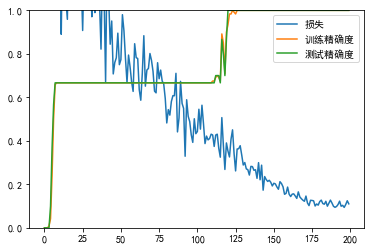

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  

np.random.seed(1)
tf.set_random_seed(1)

sess=tf.Session()
#产生数据
iris=datasets.load_iris()
x_vals=iris.data
y_vals=np.array([1 if y==0 else -1 for y in iris.target])
#划分数据为训练集和测试集
train_indices = np.random.choice(len(x_vals),round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
#批训练中批的大小
batch_size = 100
x_data = tf.placeholder(shape=[None, 4], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
W = tf.Variable(tf.random_normal(shape=[4,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
#定义损失函数
model_output=tf.matmul(x_data,W)+b
l2_norm = tf.reduce_sum(tf.square(W))
#软正则化参数
alpha = tf.constant([0.1])
#定义损失函数
classification_term = tf.reduce_mean(tf.maximum(0.,1.-model_output*y_target))
loss = classification_term+alpha*l2_norm
#输出
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target),tf.float32))
train_step=tf.train.GradientDescentOptimizer(0.01).minimize(loss)
#开始训练
sess.run(tf.global_variables_initializer())
loss_vec = []
train_accuracy = []
test_accuracy = []
for i in range(200):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    train_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_accuracy.append(train_acc_temp)
    test_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_accuracy.append(test_acc_temp)
    if (i+1)%100==0:
        print('Step #' + str(i+1) + ' W = ' + str(sess.run(W)) + 'b = ' + str(sess.run(b)))
        print('Loss = ' + str(test_acc_temp))
plt.plot(loss_vec)
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.legend(['损失','训练精确度','测试精确度'])
plt.ylim(0.,1.)
plt.show()

In [38]:
from __future__ import print_function

import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 1.183603953
Epoch: 0002 cost= 0.665320150
Epoch: 0003 cost= 0.552879970
Epoch: 0004 cost= 0.498686065
Epoch: 0005 cost= 0.465506728
Epoch: 0006 cost= 0.442582193
Epoch: 0007 cost= 0.425532841
Epoch: 0008 cost= 0.412185643
Epoch: 0009 cost= 0.401376109
Epoch: 0010 cost= 0.392403704
Epoch: 0011 cost= 0.384801484
Epoch: 0012 cost= 0.378155445
Epoch: 0013 cost= 0.372365812
Epoch: 0014 cost= 0.367300255
Epoch: 0015 cost= 0.362733760
Epoch: 0016 cost= 0.358632488
Epoch: 0017 cost= 0.354889117
Epoch: 0018 cost= 0.351455002
Epoch: 0019 cost= 0.348329910
Epoch: 0020 cost= 0.345406708
Epoch: 0021 cost= 0.342780591
Epoch: 0022 cost= 0.340274098
Epoch: 0023 cost= 0.337908560
Epoch: 0024 cost= 0.335717526
Epoch: 0025 cost= 0.333682200
Optimization Finished!
Accuracy: 0.9136


### tensorboard的使用

In [39]:
import tensorflow as tf

with tf.name_scope('graph') as scope:
    matrix1 = tf.constant([[3., 3.]],name ='matrix1')  #1 row by 2 column
    matrix2 = tf.constant([[2.],[2.]],name ='matrix2') # 2 row by 1 column
    product = tf.matmul(matrix1, matrix2,name='product')
sess = tf.Session()

writer = tf.summary.FileWriter("logs/", sess.graph)
 
init = tf.global_variables_initializer()
 
sess.run(init)

train_cost is: 1.06933e-06
train_cost is: 1.06446e-06


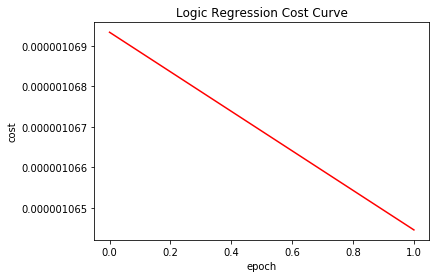

In [46]:
import tensorflow as tf  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
inputTensor=pd.read_csv("F:\\Machine+Deep Learning\\tensorInput.csv",sep=",",encoding="gbk")
  
#创建占位符  
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

#创建变量  
#tf.random_normal([1])返回一个符合正太分布的随机数  
w=tf.Variable(tf.random_normal([1,23],name='weight'))
b=tf.Variable(tf.random_normal([1,23],name='bias'))

y_predict=tf.sigmoid(tf.add(tf.multiply(X,w),b))
num_samples=len(inputTensor)
cost=tf.reduce_sum(tf.pow(y_predict-Y,2.0))/num_samples  

#学习率
lr=0.01
optimizer=tf.train.AdamOptimizer().minimize(cost)
  
#创建session 并初始化所有变量  
num_epoch=500
cost_accum=[]
cost_prev=0
#np.linspace（）创建agiel等差数组，元素个素为num_samples 产生数据源用来训练用
xs=inputTensor.drop(["y"],axis=1).as_matrix(columns=None)
ys=inputTensor["y"].as_matrix(columns=None)
with tf.Session() as sess:  
    #初始化所有变量
    sess.run(tf.initialize_all_variables())
    #开始训练  
    for epoch in range(num_epoch):
        for x,y in zip(xs,ys):
            sess.run(optimizer,feed_dict={X:x,Y:y})  
        train_cost=sess.run(cost,feed_dict={X:x,Y:y})  
        cost_accum.append(train_cost)  
        print ("train_cost is:",str(train_cost))
  
        #当误差小于10-6时 终止训练  
        if np.abs(cost_prev-train_cost)<1e-6:  
            break  
        #保存最终的误差  
        cost_prev=train_cost  
#画图  画出每一轮训练所有样本之后的误差
plt.plot(range(len(cost_accum)),cost_accum,'r')
plt.title('Logic Regression Cost Curve')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.show()

In [45]:
# inputTensor.drop(["y"],axis=1).as_matrix(columns=None)
len(cost_accum)

1

In [41]:
inputTensor["y"].as_matrix(columns=None)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)